<a href="https://colab.research.google.com/github/SaKi1309/ML_Notebooks/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="0"></a>
# 0 - Initial Steps

In [1]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs
!pip install DeepSaki

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-js_vmo8s
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-js_vmo8s
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173555 sha256=04524b321d53b8c90ae45ec122d714402721f3c08abbc033efa61f42596e8696
  Stored in directory: /tmp/pip-ephem-wheel-cache-8c8kmhcd/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs
     |████████████████████████████████| 108 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.7 MB/s 
  Created wheel for DeepSaki: filename=DeepSaki-0.1.0-py3-none-any.whl size=29601 sha256=8306462e93217bfbb04fb734ae42c1973a669179cfd8a8cd62882803993c74d1
  Stored in directory: /root/.cache/pip/wheels/fd/32/16/1243ea44d688117ffb1a016d286ae07ec6e2b5f13297088ebe
Successfully built DeepSaki


In [2]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
import random

from IPython import display
import DeepSaki

tf.__version__
#DeepSaki.utils.EnableXlaAcceleration()

'2.7.0'

In [3]:
strategy, RUNTIME_ENVIRONMENT, hw_accelerator_handle = DeepSaki.utils.DetectHw()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.110.255.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.110.255.2:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.110.255.2:8470']
Number of accelerators:  8
____________________________________________________________________________________
Device List: 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17290685888095697987
xla_global_id: -1
]


In [4]:

global_batch_size =256 
batchsize_per_replica = int(global_batch_size / strategy.num_replicas_in_sync)
CONFIG = {
    "BUFFER_SIZE":60000,
    "BATCH_SIZE_PER_REPLICA":batchsize_per_replica,
    "GLOBAL_BATCH_SIZE":global_batch_size,
    "REDUCTION_STRATEGY":tf.keras.losses.Reduction.NONE,
    "EPOCHS":50,
    "NOISE_DIM":100,
    "num_examples_to_generate":16,
    "NOISE_SHAPE":(100,),
    #"IMAGE_SHAPE":(32,32,3)
    "IMAGE_SHAPE":(28,28,1)
}

GLOBAL_PARAM = {
    "RANDOM_SEED": 10
}
print(CONFIG)
print(GLOBAL_PARAM)

{'BUFFER_SIZE': 60000, 'BATCH_SIZE_PER_REPLICA': 32, 'GLOBAL_BATCH_SIZE': 256, 'REDUCTION_STRATEGY': 'none', 'EPOCHS': 50, 'NOISE_DIM': 100, 'num_examples_to_generate': 16, 'NOISE_SHAPE': (100,), 'IMAGE_SHAPE': (28, 28, 1)}
{'RANDOM_SEED': 10}


In [5]:
#Seed is used to have comparability between runs while maintaining random behavior!
random.seed(GLOBAL_PARAM["RANDOM_SEED"])
np.random.seed(seed=GLOBAL_PARAM["RANDOM_SEED"])

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
latent_noise = tf.random.normal([CONFIG["num_examples_to_generate"], CONFIG["NOISE_DIM"]])

<a name="1"></a>
# 1 - Dataset

The dataset is loaded, pre-processed and finally, a distributed dataset is created.

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], *CONFIG["IMAGE_SHAPE"]).astype('float32')
test_images = test_images.reshape(test_images.shape[0], *CONFIG["IMAGE_SHAPE"]).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
test_images = (test_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

print("Shape of train_images: {}".format(np.shape(train_images)))
print("Shape of test_images: {}".format(np.shape(test_images)))

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(CONFIG["BUFFER_SIZE"]).batch(CONFIG["GLOBAL_BATCH_SIZE"],drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(CONFIG["BUFFER_SIZE"]).batch(CONFIG["GLOBAL_BATCH_SIZE"],drop_remainder=True)

#distribute
train_dataset_distributed = strategy.experimental_distribute_dataset(train_dataset)
test_dataset_distributed = strategy.experimental_distribute_dataset(test_dataset)

11501568/11490434 [==============================] - 0s 0us/step
Shape of train_images: (60000, 28, 28, 1)
Shape of test_images: (10000, 28, 28, 1)


<a name="2"></a>
# 2 - Model Definition

<a name="2-1"></a>
## 2.1. Generator

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 tf.nn.gelu (TFOpLambda)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                 

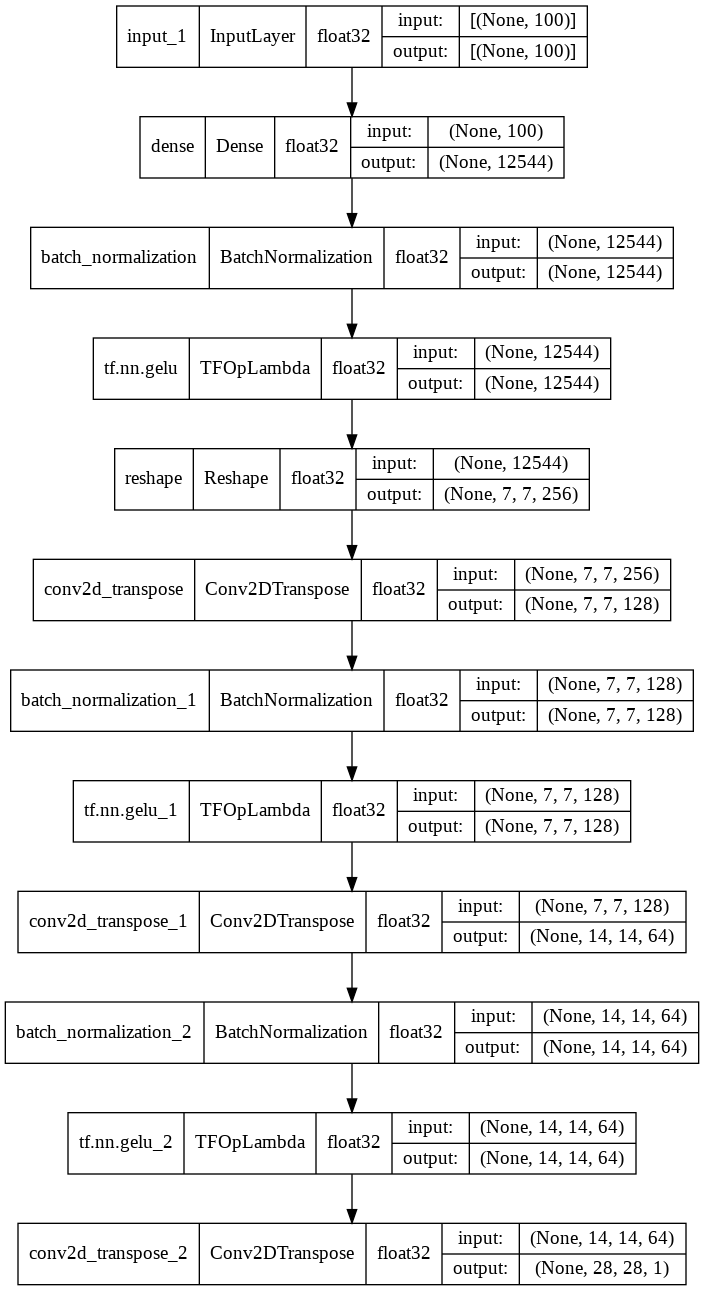

In [7]:
def Generator(inputShape = CONFIG["NOISE_SHAPE"]):
  # specify the input shape
  input_tensor = tf.keras.layers.Input(shape = inputShape)
 
  x = tf.keras.layers.Dense(7*7*256, use_bias=False)(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.gelu(x)

  x = tf.keras.layers.Reshape((7, 7, 256))(x)

  x = tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.gelu(x)

  x = tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.activations.gelu(x)

  x = tf.keras.layers.Conv2DTranspose(CONFIG["IMAGE_SHAPE"][-1], (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')(x)

  # create the model
  model = tf.keras.Model(inputs=input_tensor, outputs=x, name = "Generator")

  return model

#Testcode
model = Generator()
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=False, show_dtype=True, to_file="generator.png")

Important to note, that the reduction strategy is set to tf.keras.losses.Reduction.NONE. Additionall,in line 4, the loss is reduced by summing all values and is scaled by the global batch size, not the per_replica_batch_size.

In [8]:
def generator_loss(fake_output):
  cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True,reduction=CONFIG["REDUCTION_STRATEGY"])
  loss = cross_entropy(tf.ones_like(fake_output), fake_output)
  loss = tf.reduce_sum(loss) *(1. / CONFIG["GLOBAL_BATCH_SIZE"])
  return loss

<a name="2-2"></a>
## 2.2. Discriminator

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 tf.nn.gelu_3 (TFOpLambda)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 tf.nn.gelu_4 (TFOpLambda)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)       

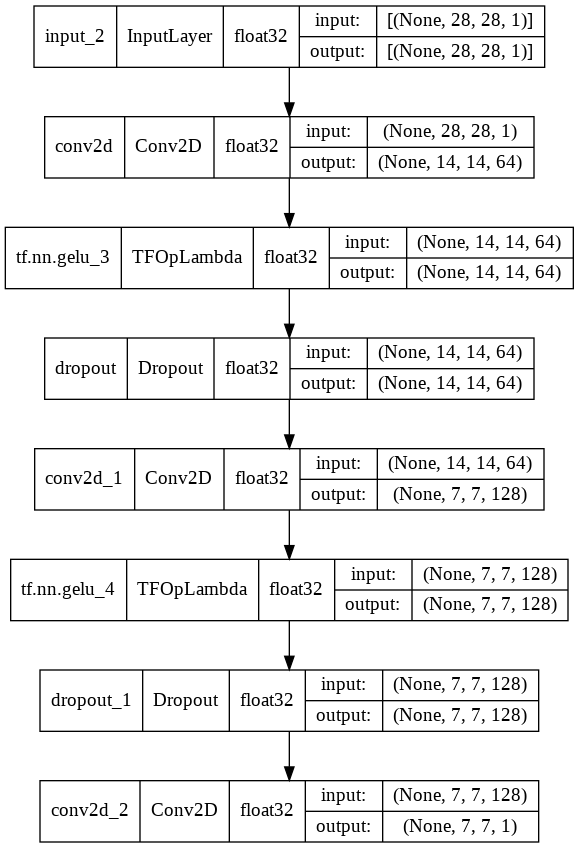

In [10]:
def Discriminator(inputShape = CONFIG["IMAGE_SHAPE"]):
  # specify the input shape
  input_tensor = tf.keras.layers.Input(shape = inputShape)
  x = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')(input_tensor)
  x = tf.keras.activations.gelu(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  x = tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
  x = tf.keras.activations.gelu(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  x = tf.keras.layers.Conv2D(1, (3, 3), strides=(1, 1), padding='same')(x)

  # create the model
  model = tf.keras.Model(inputs=input_tensor, outputs=x, name = "Discriminator")

  return model

#Testcode
model = Discriminator()
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=False, show_dtype=True, to_file="discriminator.png")

As for the generator loss, the discriminator loss sets the reduction strategy to NONE, reduces by summing all values and scales by the global batch size

In [11]:
def discriminator_loss(real_output, fake_output):
  cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True,reduction=CONFIG["REDUCTION_STRATEGY"])
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  total_loss = tf.reduce_sum(total_loss) *(1. / CONFIG["GLOBAL_BATCH_SIZE"])
  return total_loss

<a name="2-3"></a>
## 2.3. GAN

In [12]:
class GAN(tf.keras.Model):
  def __init__(self, generator, discriminator, strategy = None):
    super(GAN, self).__init__()

    self.generator = generator
    self.discriminator = discriminator
    self.strategy = strategy

  def compile(self, generator_optimizer, discriminator_optimizer, generator_loss, discriminator_loss):
    super(GAN, self).compile()
    #super(VoloGAN, self).compile(steps_per_execution = 64)
    self.generator_optimizer = generator_optimizer
    self.discriminator_optimizer = discriminator_optimizer
    self.generator_loss = generator_loss
    self.discriminator_loss = discriminator_loss

  def call(self, batch):
    generated = self.generator(batch)
    discriminated = self.discriminator(generated)
    return tf.stack([generated, discriminated])

  def print_summary(self):
    def getNumberOfElements(listOfLayers):
      numElements = 0
      for layer in listOfLayers:
        numElements += tf.reduce_prod(layer.shape)
      return numElements

    summaryString = ""
    summaryString += "--------------------------------------------------\n"
    summaryString += "------------------- Summary GAN ------------------\n"
    summaryString += "--------------------------------------------------\n"
    
    summaryString += "\n"
    summaryString += self.generator.name + ":\n"
    gen_total = getNumberOfElements(self.generator.variables)
    gen_trainable = getNumberOfElements(self.generator.trainable_variables)
    gen_nonTrainable = gen_total - gen_trainable
    summaryString += "  Total Variables: {:,}\n".format(gen_total)
    summaryString += "  Trainable Variables: {:,}\n".format(gen_trainable)
    summaryString += "  Non-trainable Variables: {:,}\n".format(gen_nonTrainable)

    summaryString += "\n"
    summaryString += self.discriminator.name + ":\n"
    disc_total = getNumberOfElements(self.discriminator.variables)
    disc_trainable = getNumberOfElements(self.discriminator.trainable_variables)
    disc_nonTrainable = disc_total - disc_trainable
    summaryString += "  Total Variables: {:,}\n".format(disc_total)
    summaryString += "  Trainable Variables: {:,}\n".format(disc_trainable)
    summaryString += "  Non-trainable Variables: {:,}\n".format(disc_nonTrainable)

    summaryString += "_________________________________________________\n"

    GAN_total = gen_total + disc_total
    GAN_trainable = gen_trainable + disc_trainable
    GAN_nonTrainable = gen_nonTrainable + disc_nonTrainable
    summaryString += "Total Variables: {:,}\n".format(GAN_total)
    summaryString += "Trainable Variables: {:,}\n".format(GAN_trainable)
    summaryString += "Non-trainable Variables: {:,}\n".format(GAN_nonTrainable)

    summaryString += "_________________________________________________\n"

    print(summaryString)

    return summaryString

  def generate_and_save_images(self, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = self.generator(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))
    fig.suptitle("Epoch: {}".format(epoch), fontsize=10)

    for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      if CONFIG["IMAGE_SHAPE"][-1]==1:
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      else:
        plt.imshow(predictions[i, :, :, 0:3] * 0.5 + 0.5)
      plt.axis('off')

    with tf.device('/job:localhost'): 
      plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

  @tf.function
  def train_step(self, batch):
    noise = tf.random.normal([CONFIG["BATCH_SIZE_PER_REPLICA"], CONFIG["NOISE_DIM"]])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = self.generator(noise, training=True)

      real_output = self.discriminator(batch, training=True)
      fake_output = self.discriminator(generated_images, training=True)

      gen_loss = self.generator_loss(fake_output)
      disc_loss = self.discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

    self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
    self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))
    return [gen_loss, disc_loss]

  @tf.function
  def test_step(self, batch):
    noise = tf.random.normal([CONFIG["BATCH_SIZE_PER_REPLICA"], CONFIG["NOISE_DIM"]])
    generated_images = self.generator(noise, training=False)

    real_output = self.discriminator(batch, training=False)
    fake_output = self.discriminator(generated_images, training=False)

    gen_loss = self.generator_loss(fake_output)
    disc_loss = self.discriminator_loss(real_output, fake_output)

    return [gen_loss, disc_loss]

  @tf.function
  def distributed_train_step(self, batch_train):
    ''' 
    per_replica_loss_vector:  vector of shape [per_replica-loss_gen1, per_replica-loss_gen2, per_replica-loss_disc1, per_replica-loss_disc1]
    reduced_loss_vector:      Vector of results of the different devices (for TPU 8)
    
    '''
    per_replica_loss_vector = self.strategy.run(self.train_step, args=(batch_train,))

    #reduce the result of the replicas for every loss value returned!
    reduced_loss_vector = []
    for per_replica_loss in per_replica_loss_vector:
      reduced_loss_vector.append(self.strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_loss, axis=None))
    
    return reduced_loss_vector

  @tf.function
  def distributed_test_step(self, batch_test):
    ''' 
    per_replica_loss_vector:  vector of shape [per_replica-loss_gen1, per_replica-loss_gen2, per_replica-loss_disc1, per_replica-loss_disc1]
    reduced_loss_vector:      Vector of results of the different devices (for TPU 8)
    
    '''
    per_replica_loss_vector = self.strategy.run(self.test_step, args=(batch_test,))

    #reduce the result of the replicas for every loss value returned!
    reduced_loss_vector = []
    for per_replica_loss in per_replica_loss_vector:
      reduced_loss_vector.append(self.strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_loss, axis=None))
    
    return reduced_loss_vector

  def train(self, train_dataset_distributed, test_dataset_distributed, epochs):
    for epoch in range(epochs):
      start = time.time()

      # initialize training parameter
      total_train_loss = [0., 0.]
      num_train_batches = 0

      for image_batch in train_dataset_distributed:
        total_train_loss = tf.math.add(total_train_loss, self.distributed_train_step(image_batch))
        num_train_batches += 1
      total_train_loss = total_train_loss / float(num_train_batches)  #* CONFIG["BATCH_SIZE_PER_REPLICA"]

      if test_dataset_distributed is not None:
        # initialize training parameter
        total_test_loss = [0., 0.]
        num_test_batches = 0

        for image_batch in test_dataset_distributed:
          total_test_loss = tf.math.add(total_test_loss, self.distributed_test_step(image_batch))
          num_test_batches += 1
        total_test_loss = total_test_loss / float(num_test_batches) # * CONFIG["BATCH_SIZE_PER_REPLICA"]

      # Produce images for the GIF as you go
      display.clear_output(wait=True)
      self.generate_and_save_images(epoch + 1, latent_noise)

      print ('Time for epoch {0:5} is {1:.3f} sec'.format(epoch + 1, time.time()-start))
      print("Train:\nGen. Loss: {0:.6f} \nDisc. Loss: {1:.6f}".format(total_train_loss[0], total_train_loss[1]))
      if test_dataset_distributed is not None:
        print("Test:\nGen. Loss: {0:.6f} \nDisc. Loss: {1:.6f}".format(total_test_loss[0], total_test_loss[1]))

    # Generate after the final epoch
    display.clear_output(wait=True)
    self.generate_and_save_images(epochs, latent_noise)


<a name="3"></a>
# 3 - Training

It'S important to note, that the model is initialized within the context of `strategy.scope()`

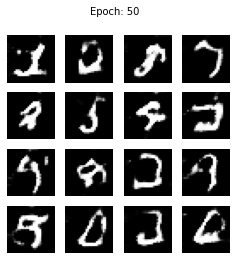

In [13]:
with strategy.scope():
  ganModel = GAN(
      Generator(),
      Discriminator(),
      strategy
      )
ganModel.compile(
    generator_optimizer = tf.keras.optimizers.Adam(1e-4),
    discriminator_optimizer = tf.keras.optimizers.Adam(1e-4),
    generator_loss = generator_loss, 
    discriminator_loss = discriminator_loss
)
ganModel.print_summary()

ganModel.train(
    train_dataset_distributed=train_dataset_distributed,
    test_dataset_distributed = None,# test_dataset, 
    epochs = CONFIG["EPOCHS"])

<a name="4"></a>
# 4 - Visualization

In [14]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

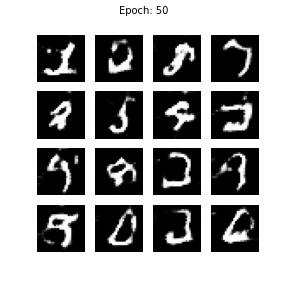

In [15]:
display_image(CONFIG["EPOCHS"])

In [16]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


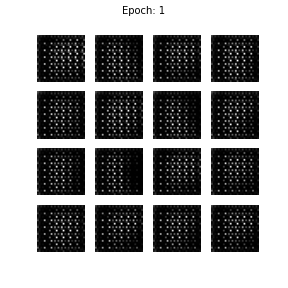

In [17]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)